# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu101 (Tesla T4)


# Google Drive Connection Establishment

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


#Data Preparation

In [ ]:
%mkdir project_files

In [ ]:
!cp -av /mydrive/project/images/ /content/yolov5/project_files
!cp -av /mydrive/project/cfg/ /content/yolov5/project_files
!cp -av /mydrive/project/labels/ /content/yolov5/project_files

'/mydrive/project/images/' -> '/content/yolov5/project_files/images'
'/mydrive/project/images/train' -> '/content/yolov5/project_files/images/train'
'/mydrive/project/images/train/train.txt' -> '/content/yolov5/project_files/images/train/train.txt'
'/mydrive/project/images/train/toplu' -> '/content/yolov5/project_files/images/train/toplu'
'/mydrive/project/images/train/toplu/toplu11.jpg' -> '/content/yolov5/project_files/images/train/toplu/toplu11.jpg'
'/mydrive/project/images/train/toplu/toplu15.jpg' -> '/content/yolov5/project_files/images/train/toplu/toplu15.jpg'
'/mydrive/project/images/train/toplu/toplu12.jpg' -> '/content/yolov5/project_files/images/train/toplu/toplu12.jpg'
'/mydrive/project/images/train/toplu/toplu10.jpg' -> '/content/yolov5/project_files/images/train/toplu/toplu10.jpg'
'/mydrive/project/images/train/toplu/toplu14.jpg' -> '/content/yolov5/project_files/images/train/toplu/toplu14.jpg'
'/mydrive/project/images/train/toplu/toplu13.jpg' -> '/content/yolov5/project_f

#Optional for Reporting Results

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.8MB 32.0MB/s 
     |████████████████████████████████| 133kB 54.4MB/s 
     |████████████████████████████████| 174kB 47.6MB/s 
     |████████████████████████████████| 102kB 13.2MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

#Training

**Copy & Paste to Console**

function ClickConnect(){ console.log("Working"); document.querySelector("colab-toolbar-button#connect").click() } setInterval(ClickConnect,60000)

In [ ]:
# Train YOLOv5s on Dataset for 3 epochs
!python train.py --data /project_files/cfg/cfg.yaml --weights yolov5s.pt

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-143-g3597d28 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='./project_files/cfg/cfg.yaml', device='', entity=None, epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-06-05 17:31:40.458451: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfull

#Output

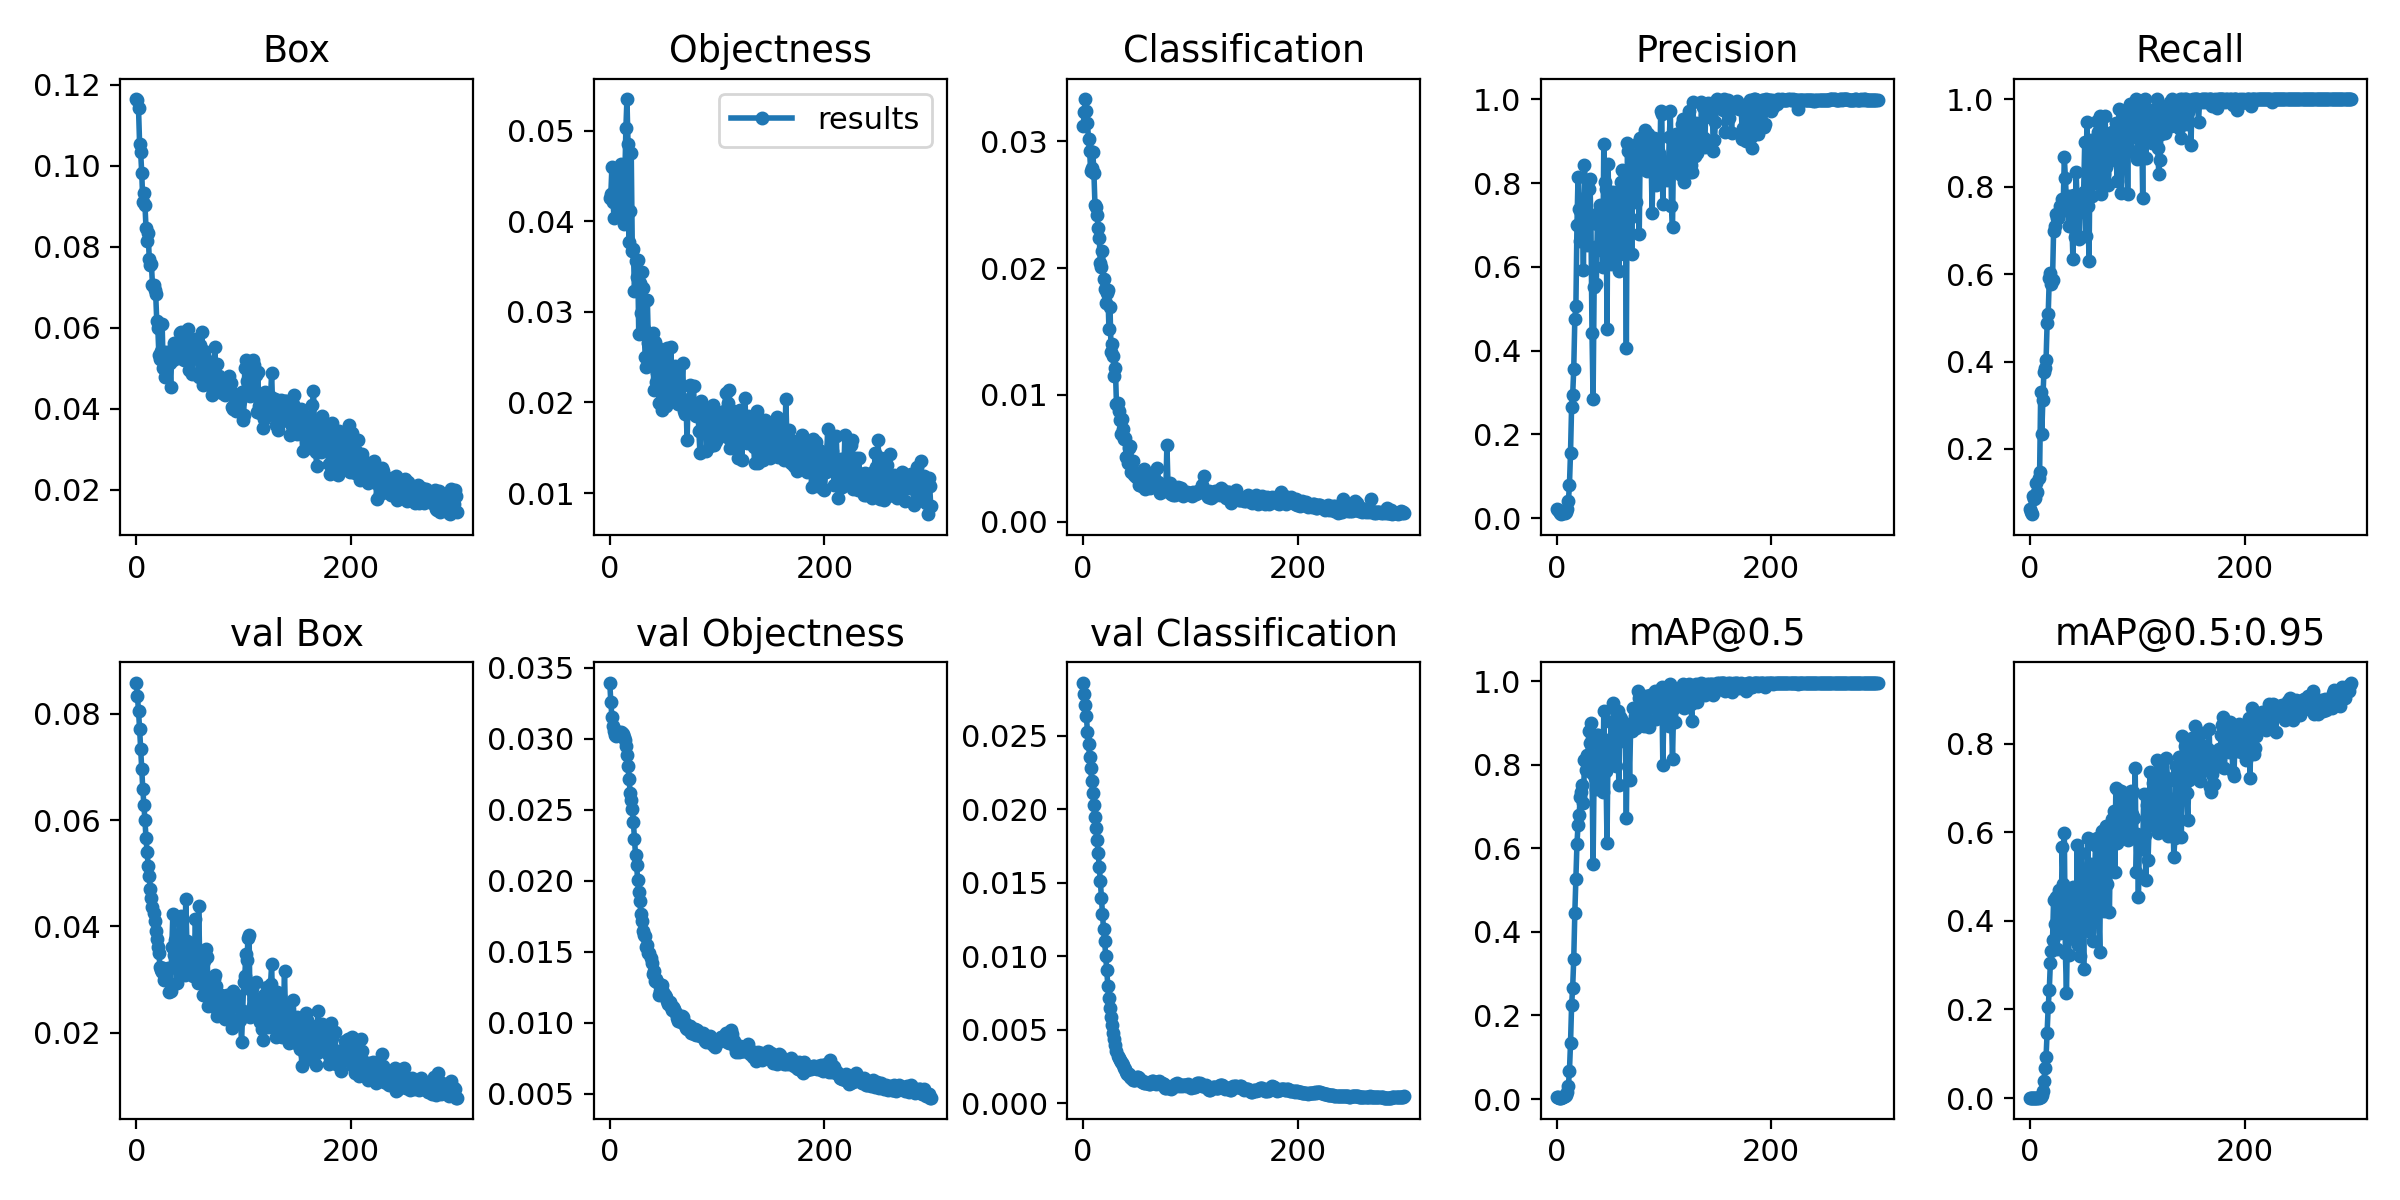

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png
Image(filename='runs/train/exp/results.png', width=800)